<a href="https://colab.research.google.com/github/KhanFaisa/Deep-Learning/blob/main/Mobile_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mobile Price Range Multiclass Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read The Train Data

In [5]:
import pandas as pd
df = pd.read_csv('mobile_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Step 2 : Perform Basic data Quality Checks

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Price Range is Target
1. 0 - Cheap
2. 1 - Medium
3. 2 - Expensive
4. 3 - Very Expensive

In [7]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y (price_range)


In [9]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]


In [10]:
X.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [11]:
Y.head()


,price_range
0,1
1,2
2,2
3,2
4,1


In [12]:
Y.value_counts()


price_range
0              500
1              500
2              500
3              500
Name: count, dtype: int64

<Axes: xlabel='price_range'>

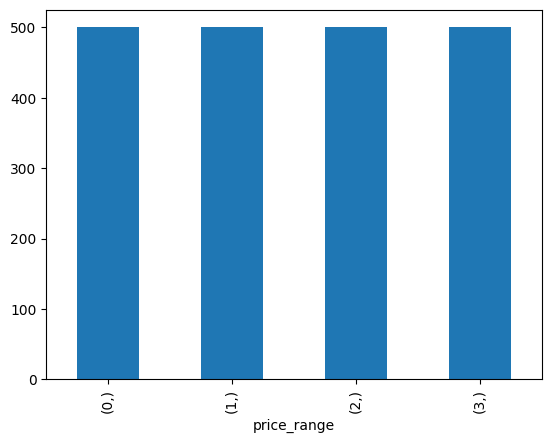

In [13]:
Y.value_counts().plot(kind='bar')


### Step 4: Create A Preprocessing Pipeline For X, One Hot Encode The Target Feature

In [14]:
X.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


### Step 5 : Apply Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [19]:
xtrain.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [20]:
ytrain.head()


,price_range
968,1
240,2
819,0
692,3
420,1


In [21]:
xtest.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
353,-0.128653,-0.990050,-1.253064,-1.019184,0.619880,0.957886,-1.325520,-0.006069,-0.063548,1.521249,1.003414,-0.834197,-0.614489,0.404613,1.589078,2.579151,1.462493,0.559641,-1.006018,-1.014099
1333,1.669628,-0.990050,1.688833,-1.019184,1.080671,-1.043966,-0.994781,-0.352878,1.575296,1.084046,1.333295,-0.793626,-0.693176,-0.745267,-1.022389,-1.094526,-0.551204,0.559641,0.994018,-1.014099
905,-0.567980,1.010051,0.585621,-1.019184,-0.071307,-1.043966,-0.829411,-1.046495,0.727618,-0.664768,1.498235,-0.877022,0.329755,1.630107,1.351672,0.283103,1.462493,0.559641,0.994018,-1.014099
1289,-1.419319,1.010051,-1.253064,0.981177,0.619880,-1.043966,1.430640,-0.006069,-0.289595,0.209639,-0.316108,0.847234,1.635035,-0.201218,0.402047,-0.176107,-1.100394,0.559641,-1.006018,-1.014099


In [22]:
ytest.head()


,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [23]:
xtrain.shape


(1600, 20)

In [24]:
xtest.shape



(400, 20)

### Apply One Hot Encoding On ytrain & ytest

In [25]:
from keras.utils import to_categorical


In [26]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [27]:
ytrain_cat[0:5]


array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [28]:
ytrain.head()


,price_range
968,1
240,2
819,0
692,3
420,1


In [29]:
ytest_cat[0:5]


array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [30]:
ytest.head()


,price_range
1860,0
353,2
1333,1
905,3
1289,1


### Step 6 : Build the Neural Network

In [31]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [32]:
xtrain.shape


(1600, 20)

In [33]:
ytrain_cat.shape


(1600, 4)

In [34]:
model = Sequential()


In [35]:
# Create input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add Dropout layer 1
model.add(Dropout(rate=0.3))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Dropout Layer 2
model.add(Dropout(rate=0.2))
# Add Output Layer'
model.add(Dense(units=ytrain_cat.shape[1], activation='softmax'))


In [36]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [38]:
es = EarlyStopping(monitor='val_loss', patience=15)


In [39]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2, epochs=200, callbacks=[es])


Epoch 1/200
40/40 [==============================] - 4s 9ms/step - loss: 1.4125 - accuracy: 0.3172 - val_loss: 1.2793 - val_accuracy: 0.4156
Epoch 2/200
40/40 [==============================] - 0s 7ms/step - loss: 1.2357 - accuracy: 0.4352 - val_loss: 1.1331 - val_accuracy: 0.5250
Epoch 3/200
40/40 [==============================] - 0s 7ms/step - loss: 1.0993 - accuracy: 0.5008 - val_loss: 0.9924 - val_accuracy: 0.5750
Epoch 4/200
40/40 [==============================] - 0s 8ms/step - loss: 0.9603 - accuracy: 0.5836 - val_loss: 0.8676 - val_accuracy: 0.6094
Epoch 5/200
40/40 [==============================] - 0s 7ms/step - loss: 0.8620 - accuracy: 0.6148 - val_loss: 0.7568 - val_accuracy: 0.6969
Epoch 6/200
40/40 [==============================] - 0s 7ms/step - loss: 0.7810 - accuracy: 0.6664 - val_loss: 0.6705 - val_accuracy: 0.7594
Epoch 7/200
40/40 [==============================] - 0s 7ms/step - loss: 0.7020 - accuracy: 0.7016 - val_loss: 0.5988 - val_accuracy: 0.7781
Epoch 8/200
4

### Plot The Learning Curve

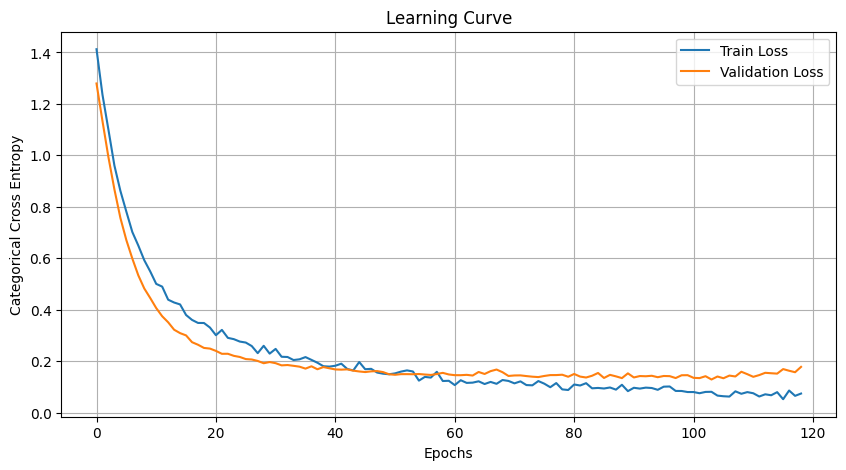

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label ='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.grid()
plt.legend()
plt.show()

### Step 7 : Evauluate Model

In [41]:
model.evaluate(xtrain, ytrain_cat)


50/50 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9844


[0.04515949264168739, 0.984375]

In [42]:
model.evaluate(xtest, ytest_cat)


13/13 [==============================] - 0s 7ms/step - loss: 0.1947 - accuracy: 0.9200


[0.1947157084941864, 0.9200000166893005]